In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

▶선택하신 강아지 단어의 출현빈도수는 => 4 번입니다.


(0.0, 10.0)

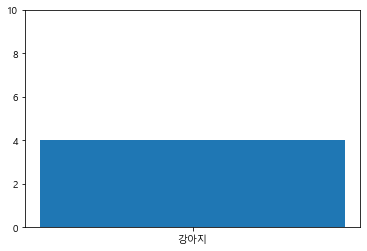

In [2]:
txt='강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑 친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑'
find_word='강아지'
cnt=txt.count(find_word)
print('▶선택하신 %s 단어의 출현빈도수는 => %d 번입니다.' %(find_word,cnt))
plt.bar(find_word,cnt)
plt.ylim(0,10)

In [3]:
#두 개이상의 string를 갖는 리스트구조에서는 한 개의 문자열로 합친후 작업해야함.

txtList=['강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑',
 '친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑']

txt=''.join(txtList)
cnt=txt.count(find_word)
cnt

4

#### [미션 1] ‘강아지’, ‘미용’, ‘친구’ 관련한 자료만 단어별 빈도수를 집계하고, 막대차트와 원차트 제작

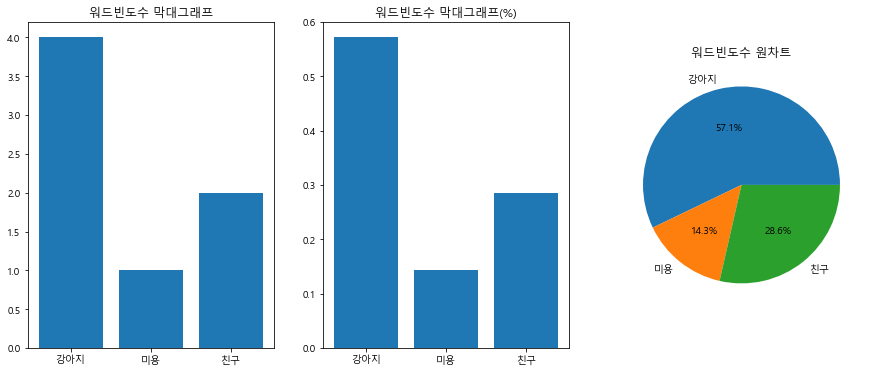

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
txtList=['강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑',
 '친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑']
txt=''.join(txtList)

words=['강아지','미용','친구']
cnts=[txt.count(i) for i in words]
cnts_p=[i/sum(cnts) for i in cnts]

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.bar(words,cnts)
plt.title('워드빈도수 막대그래프')
plt.subplot(1,3,2)
plt.bar(words,cnts_p)
plt.title('워드빈도수 막대그래프(%)')
plt.subplot(1,3,3)
plt.pie(cnts,labels=words,autopct='%1.1f%%' )
plt.title('워드빈도수 원차트')
plt.show()

#### [미션 2] 네이버 영화 주요정보에서 특정단어 "수학, 과학, 학문" 단어 빈도수 차트

- 크롤링 사이트 : https://movie.naver.com/movie/bi/mi/basic.naver?code=190991
- 주요단어: 수학, 과학 , 학문

In [5]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

url='https://movie.naver.com/movie/bi/mi/basic.naver?code=190991'
response=requests.get(url)
if response.status_code==200:
    html=response.text
    soup=BeautifulSoup(html,'html.parser')
else:
    print(response.status_code)
    
txt_List=[]
for i in soup.find_all('p','con_tx'):
    txt_List.append(i.text)

txt=''.join(txt_List)

find_word=['수학','과학','학문']
cnt=[]
for i in find_word:
    cnt.append(txt.count(i))

percent=np.array(cnt)/sum(cnt)
print(word,cnt,percent*100)
## ----------차트 출력
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) ; plt.bar(word, cnt) ; plt.title('워드 빈도수 막대차트')
plt.subplot(1,3,2) ; plt.bar(word, percent) ; plt.title('워드 빈도수 %차트')
plt.subplot(1,3,3) ; plt.pie(cnt, labels=word, autopct='%1.1f%%', shadow=False)
plt.title('워드 빈도수 원차트') 
plt.show()

NameError: name 'word' is not defined

['수학', '과학', '학문'] [44, 2, 1] [93.61702127659575, 4.25531914893617, 2.127659574468085]


Text(0.5, 1.0, '워드 빈도수 원그래프(%)')

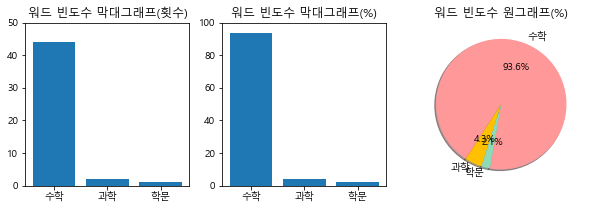

In [3]:
import requests 
from bs4 import BeautifulSoup as bs 

# url에 접근해서 크롤링하기 
url='https://movie.naver.com/movie/bi/mi/basic.naver?code=190991'
html=requests.get(url).text
soup=bs(html,'html.parser')

# 텍스트 만들기 - 텍스트 리스트> 텍스트 하나로 
contents=soup.find_all('p','con_tx')
text_list=[]
for i in contents:
    text_list.append(i.text.replace('\xa0',''))
text=(' '.join(text_list))

# 데이터 확인 
words=['수학','과학','학문']
cnts=[text.count(i) for i in words]
percents=[j/sum(cnts)*100 for j in cnts]
print(words,cnts,percents)

# 그래프 그리기 
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.bar(words,cnts)
plt.ylim(0,50)
plt.title('워드 빈도수 막대그래프(횟수)')
plt.subplot(132)
plt.bar(words,percents)
plt.ylim(0,100)
plt.title('워드 빈도수 막대그래프(%)')
plt.subplot(133)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(percents,labels=words,autopct='%.1f%%',startangle=260,shadow=True,colors=colors)
plt.title('워드 빈도수 원그래프(%)')
